In [63]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from datetime import timedelta
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_csv("cardio_train.csv")

# Overview 

In [65]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [66]:
data.shape

(70000, 13)

# Checking Missing Value

In [67]:
data.isnull().sum().sum()

0

In [68]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# For X and Y column 

In [69]:
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1:]

# Before Remove Outlier

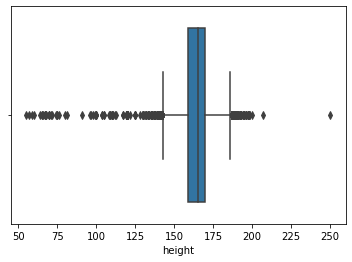

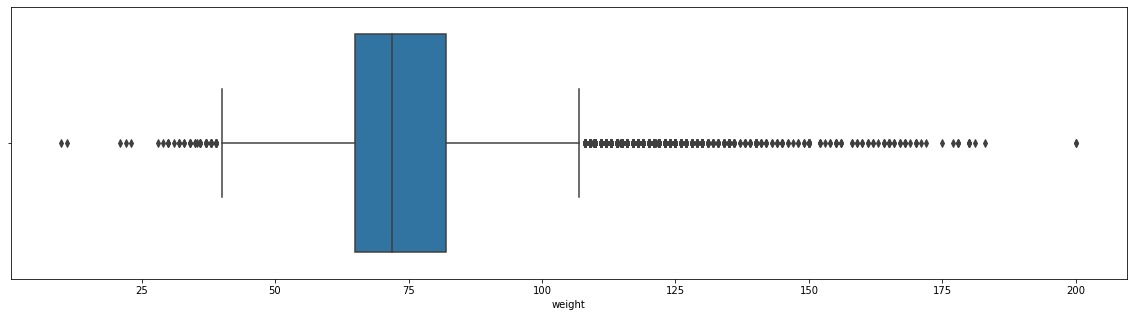

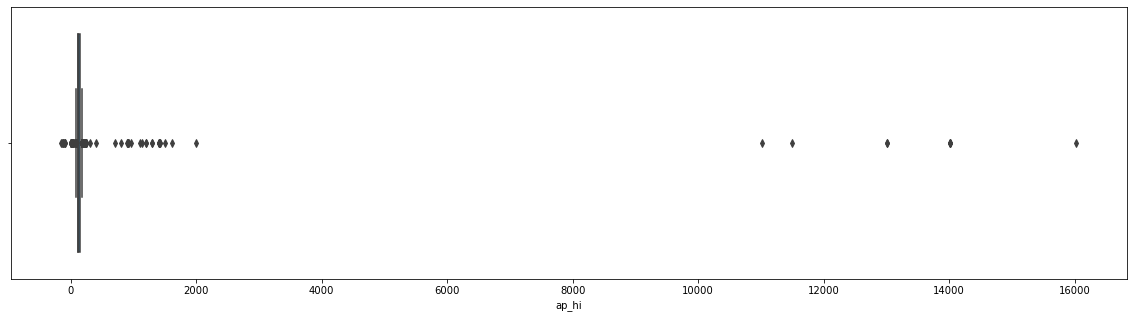

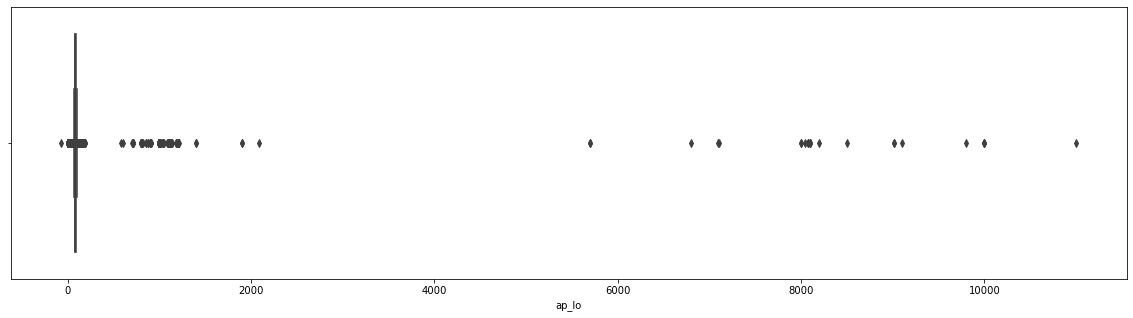

<Figure size 1440x360 with 0 Axes>

In [70]:
for i in data.iloc[:,3:7]:
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Outlier Detect and Handle Function

In [71]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    #sns.boxplot(coloumn)
    return coloumn

# Handle Outlier

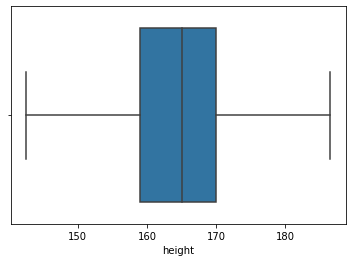

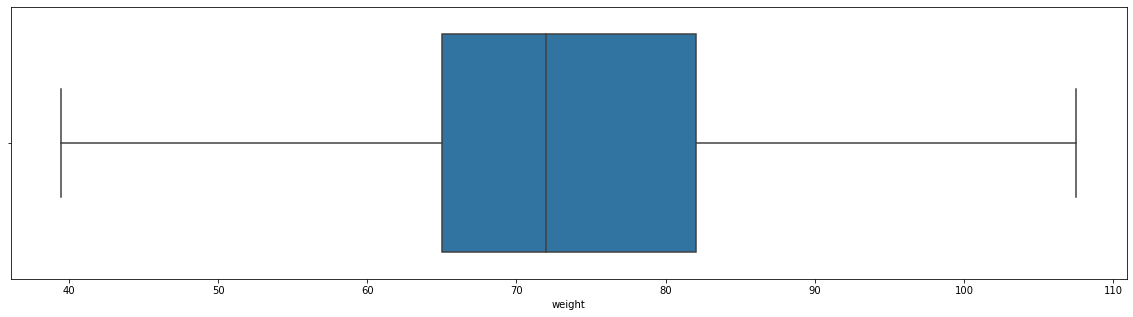

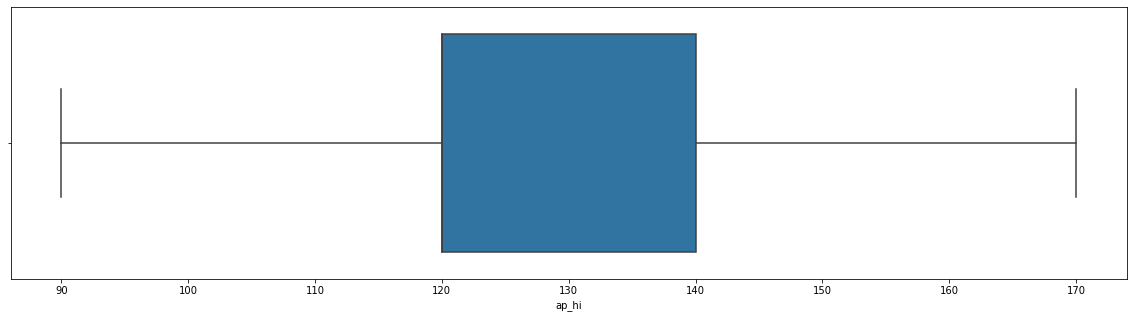

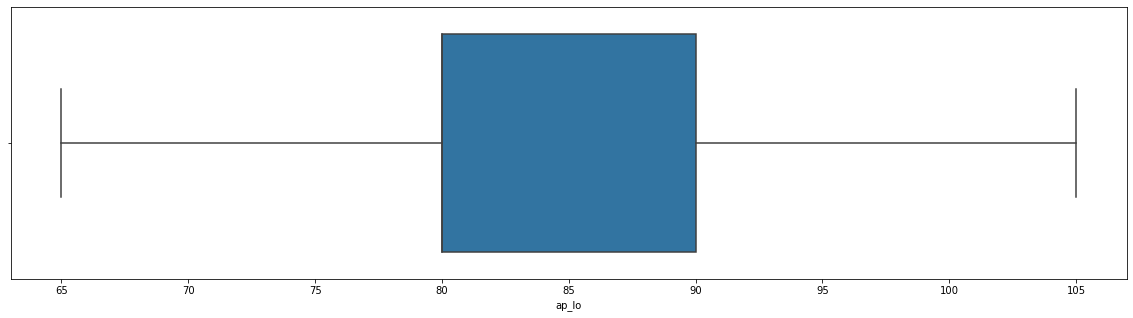

<Figure size 1440x360 with 0 Axes>

In [72]:
for i in data.iloc[:,3:7]:
    data[i] = outlier(data[i])
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Convert Days to Year and Handle Outlier 

In [73]:
data['age'] = (data['age'] / 365).round().astype('int')
data['age'] = outlier(data['age'])

In [74]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,2,52.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,4,48.0,1,156.0,56.0,100.0,65.0,1,1,0,0,0,0


In [75]:
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1:]

# Applying Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [77]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X = sc.fit_transform(X)

# KFold and Cross Val Score

In [78]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold_validation = KFold(8)

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
dta_model=DecisionTreeClassifier()

start = datetime.datetime.now()
results=cross_val_score(model,X,Y,cv=kfold_validation)
end = datetime.datetime.now()

dta_time = end - start
print(results)
print(np.mean(results))

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(dta_model, 'model/Decision_Tree.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("Decision Tree Run Time - ",dta_time)

[0.63851429 0.62914286 0.648      0.628      0.63942857 0.64502857
 0.63017143 0.63348571]
0.6364714285714286
F1 score: 0.6291768541157294
Precision: 0.6407968458186346
Recall: 0.6179707824694817
Accuracy: 0.636
ROC AUC: 0.635989188956108
Confusion Matrix:
 [[22904 12117]
 [13363 21616]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64     35021
           1       0.64      0.62      0.63     34979

    accuracy                           0.64     70000
   macro avg       0.64      0.64      0.64     70000
weighted avg       0.64      0.64      0.64     70000

Decision Tree Run Time -  0:00:02.280416


# SVM SGDClassifier

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge')


start = datetime.datetime.now()
results=cross_val_score(sgd,X,Y,cv=kfold_validation)
end = datetime.datetime.now()

svm_sgd_time = end - start

print(results)
print(np.mean(results))
svm_sgd=np.mean(results)

y_pred = cross_val_predict(sgd, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(sgd, 'model/SGDClassifier.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("SVM SGDClassifier Run Time - ", svm_sgd_time)

[0.72342857 0.71634286 0.73188571 0.72377143 0.72171429 0.72971429
 0.71394286 0.71965714]
0.7225571428571429
F1 score: 0.6997889771598809
Precision: 0.765210899589399
Recall: 0.6446725177963921
Accuracy: 0.7236
ROC AUC: 0.7235526719075333
Confusion Matrix:
 [[28102  6919]
 [12429 22550]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74     35021
           1       0.77      0.64      0.70     34979

    accuracy                           0.72     70000
   macro avg       0.73      0.72      0.72     70000
weighted avg       0.73      0.72      0.72     70000

SVM SGDClassifier Run Time -  0:00:02.249191


# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
start = datetime.datetime.now()
results=cross_val_score(model,X,Y,cv=kfold_validation)
end = datetime.datetime.now()
rf_time = end - start
print(results)
print(np.mean(results))
rfA=np.mean(results)

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/RandomForestClassifier.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


print("Random Forest Run Time - ",rf_time)

[0.70285714 0.7016     0.7152     0.69954286 0.71485714 0.70651429
 0.69725714 0.70308571]
0.7051142857142858
F1 score: 0.7042488117973091
Precision: 0.7074486498961459
Recall: 0.7010777895308614
Accuracy: 0.7057571428571429
ROC AUC: 0.7057543369287043
Confusion Matrix:
 [[24880 10141]
 [10456 24523]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71     35021
           1       0.71      0.70      0.70     34979

    accuracy                           0.71     70000
   macro avg       0.71      0.71      0.71     70000
weighted avg       0.71      0.71      0.71     70000

Random Forest Run Time -  0:00:56.387411


# KNN Classifier (n=3)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
start = datetime.datetime.now()
results=cross_val_score(model,X,Y,cv=kfold_validation)
end = datetime.datetime.now()
knnA_three_time = end - start
print(results)
print(np.mean(results))
knnA_three=np.mean(results)


y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/KNeighborsClassifierThree.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("KNN Classifier (n=3) Run Time - ",knnA_three_time)

[0.6808     0.6792     0.68914286 0.67851429 0.68377143 0.68468571
 0.676      0.67817143]
0.6812857142857143
F1 score: 0.6783077632944976
Precision: 0.6842870857940826
Recall: 0.6724320306469596
Accuracy: 0.6812857142857143
ROC AUC: 0.6812804052609459
Confusion Matrix:
 [[24169 10852]
 [11458 23521]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68     35021
           1       0.68      0.67      0.68     34979

    accuracy                           0.68     70000
   macro avg       0.68      0.68      0.68     70000
weighted avg       0.68      0.68      0.68     70000

KNN Classifier (n=3) Run Time -  0:00:27.981100


# KNN.Model Evaluation for k=5

In [80]:
model = KNeighborsClassifier(n_neighbors=5)
start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
knnA_five_time = end - start
print(results)
print(np.mean(results))
knnA_five=np.mean(results)

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/KNeighborsClassifierFive.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


print("KNN Classifier (n=5) Run Time - ",knnA_five_time)

[0.69805714 0.7        0.7        0.69325714 0.70102857 0.70297143
 0.69268571 0.69337143]
0.6976714285714285
F1 score: 0.6941983960696482
Precision: 0.7018348623853211
Recall: 0.68672632150719
Accuracy: 0.6976714285714286
ROC AUC: 0.6976648654450658
Confusion Matrix:
 [[24816 10205]
 [10958 24021]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70     35021
           1       0.70      0.69      0.69     34979

    accuracy                           0.70     70000
   macro avg       0.70      0.70      0.70     70000
weighted avg       0.70      0.70      0.70     70000

KNN Classifier (n=5) Run Time -  0:00:31.229270


# KNN Re-generating Model for K=7

In [81]:
model = KNeighborsClassifier(n_neighbors=7)

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
knnA_seven_time = end - start

print(results)
print(np.mean(results))
knnA_seven=np.mean(results)

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/KNeighborsClassifierSeven.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("KNN Classifier (n=7) Run Time - ", knnA_seven_time)

[0.70571429 0.70914286 0.70937143 0.70822857 0.71371429 0.71257143
 0.70274286 0.70228571]
0.7079714285714285
F1 score: 0.703593074848476
Precision: 0.7138611822167299
Recall: 0.693616169701821
Accuracy: 0.7079714285714286
ROC AUC: 0.7079628205809011
Confusion Matrix:
 [[25296  9725]
 [10717 24262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71     35021
           1       0.71      0.69      0.70     34979

    accuracy                           0.71     70000
   macro avg       0.71      0.71      0.71     70000
weighted avg       0.71      0.71      0.71     70000

KNN Classifier (n=7) Run Time -  0:00:34.781758


# Naive Bayes

In [82]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()
nbA_time = end - start

print(results)
print(np.mean(results))
nbA=np.mean(results)

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/GaussianNB.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("Naive Bayes Run Time - ", nbA_time)

[0.71634286 0.71645714 0.71737143 0.71268571 0.71142857 0.71965714
 0.70937143 0.71245714]
0.7144714285714286
F1 score: 0.6838250415249545
Precision: 0.765476696415923
Recall: 0.6179136053060408
Accuracy: 0.7144714285714285
ROC AUC: 0.7144135286174418
Confusion Matrix:
 [[28399  6622]
 [13365 21614]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74     35021
           1       0.77      0.62      0.68     34979

    accuracy                           0.71     70000
   macro avg       0.72      0.71      0.71     70000
weighted avg       0.72      0.71      0.71     70000

Naive Bayes Run Time -  0:00:00.281030


# Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

gbc_time = end - start

print(results)
print(np.mean(results))
gbc=np.mean(results)

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/GradientBoostingClassifier.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("Gradient Boosting Classifier Run Time - ", gbc_time)

[0.73325714 0.73348571 0.74411429 0.73245714 0.73508571 0.74011429
 0.73085714 0.73531429]
0.7355857142857143
F1 score: 0.7248182453427692
Precision: 0.7550957189765194
Recall: 0.6968752680179536
Accuracy: 0.7355857142857143
ROC AUC: 0.7355625019453578
Confusion Matrix:
 [[27115  7906]
 [10603 24376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75     35021
           1       0.76      0.70      0.72     34979

    accuracy                           0.74     70000
   macro avg       0.74      0.74      0.74     70000
weighted avg       0.74      0.74      0.74     70000

Gradient Boosting Classifier Run Time -  0:00:50.139300


# Gradient Boosting Regressor

In [87]:
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor()

# start = datetime.datetime.now()
# results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
# end = datetime.datetime.now()

# gbr_time = end - start

# print(results)
# print(np.mean(results))
# gbr=np.mean(results)

# y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
# y_test = Y
# joblib.dump(model, 'model/GradientBoostingRegressor.joblib')

# # Calculate the F1 score, precision, and recall
# f1 = f1_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print("F1 score:", f1)
# print("Precision:", precision)
# print("Recall:", recall)

# # Calculate the accuracy
# acc = accuracy_score(y_test, y_pred)

# # Calculate the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred)

# # Generate a confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Generate a classification report
# cr = classification_report(y_test, y_pred)

# print("Accuracy:", acc)
# print("ROC AUC:", roc_auc)
# print("Confusion Matrix:\n", cm)
# print("Classification Report:\n", cr)

# print("Gradient Boosting Regressor Run Time - ", gbr_time)

# Support Vector Machine

In [85]:
from sklearn.svm import SVC
model=SVC()

start = datetime.datetime.now()
results=cross_val_score(model,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

svm_time = end - start

print(results)
print(np.mean(results))
svmA=np.mean(results)

y_pred = cross_val_predict(model, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/SVC.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("SVM Run Time - ", svm_time)

[0.73257143 0.736      0.74308571 0.72925714 0.73302857 0.73542857
 0.7272     0.73428571]
0.7338571428571428
F1 score: 0.7169037199124727
Precision: 0.7651561841123617
Recall: 0.674376054203951
Accuracy: 0.7338571428571429
ROC AUC: 0.7338214756043027
Confusion Matrix:
 [[27781  7240]
 [11390 23589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     35021
           1       0.77      0.67      0.72     34979

    accuracy                           0.73     70000
   macro avg       0.74      0.73      0.73     70000
weighted avg       0.74      0.73      0.73     70000

SVM Run Time -  0:41:15.985765


# SVM Linear Kernel

In [86]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1)

start = datetime.datetime.now()
results=cross_val_score(svm,X_scaled,Y,cv=kfold_validation)
end = datetime.datetime.now()

svm_linear_kernel_time = end - start

print(results)
print(np.mean(results))
svm_linear_kernel=np.mean(results)

y_pred = cross_val_predict(svm, X, Y, cv=kfold_validation)
y_test = Y
joblib.dump(model, 'model/svm_linear.joblib')

# Calculate the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("SVM Linear Kernel Run Time - ", svm_linear_kernel_time)

[0.72457143 0.72628571 0.73497143 0.72285714 0.72845714 0.7312
 0.7192     0.72468571]
0.7265285714285714
F1 score: 0.7003897140531827
Precision: 0.7738465795116553
Recall: 0.6396695159953115
Accuracy: 0.7265285714285714
ROC AUC: 0.7264764872458211
Confusion Matrix:
 [[28482  6539]
 [12604 22375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75     35021
           1       0.77      0.64      0.70     34979

    accuracy                           0.73     70000
   macro avg       0.73      0.73      0.72     70000
weighted avg       0.73      0.73      0.72     70000

SVM Linear Kernel Run Time -  0:22:36.683116


In [118]:
mlp_score = 0.8226285714285714
tabnet_score = 0.6526666666666667

# Accuracy Plotting

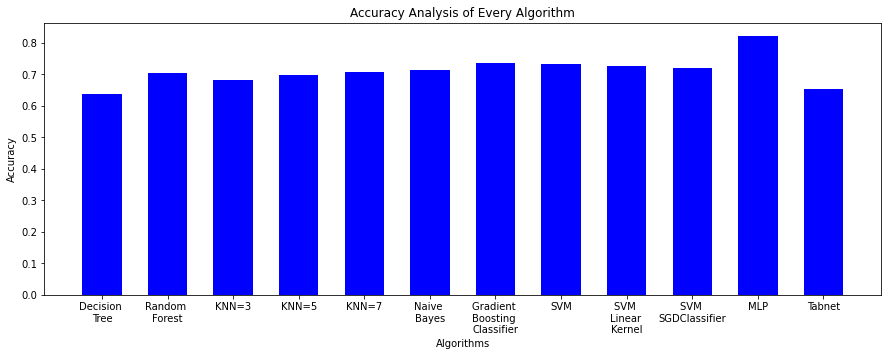

In [119]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))

algo = ['Decision \nTree', 'Random \nForest', 'KNN=3', 'KNN=5', 'KNN=7', 'Naive \nBayes', 'Gradient \nBoosting \nClassifier', 'SVM', 'SVM \nLinear \nKernel', 'SVM \nSGDClassifier', 'MLP', 'Tabnet']

algo_accuracy = [dtA, rfA, knnA_three, knnA_five, knnA_seven, nbA, gbc, svmA, svm_linear_kernel, svm_sgd, mlp_score, tabnet_score]

plt.bar(algo, algo_accuracy, color ='blue', width=0.6)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Analysis of Every Algorithm")
plt.show()

# Plotting Run Time of every Algorithm (Microseconds)

In [120]:
dta_time_micro= dta_time / datetime.timedelta(microseconds=1)
rf_time_micro = rf_time / datetime.timedelta(microseconds=1)
knnA_three_time_micro = knnA_three_time / datetime.timedelta(microseconds=1)
knnA_five_time_micro = knnA_five_time / datetime.timedelta(microseconds=1)
knnA_seven_time_micro = knnA_seven_time / datetime.timedelta(microseconds=1)
nbA_time_micro = nbA_time / datetime.timedelta(microseconds=1)
gbc_time_micro = gbc_time / datetime.timedelta(microseconds=1)
svm_time_micro = svm_time / datetime.timedelta(microseconds=1)
svm_linear_kernel_time_micro = svm_linear_kernel_time / datetime.timedelta(microseconds=1)
svm_sgd_time_micro = svm_sgd_time / datetime.timedelta(microseconds=1)
tabnet_time_micro = 1873610.0
mlp_time_micro = 1021559788.0

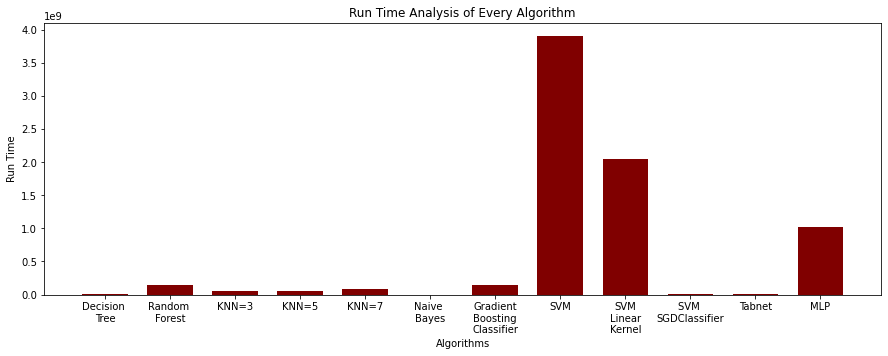

In [121]:
fig = plt.figure(figsize = (15, 5))
algo = ['Decision \nTree', 'Random \nForest', 'KNN=3', 'KNN=5', 'KNN=7', 'Naive \nBayes', 'Gradient\nBoosting\nClassifier', 'SVM', 'SVM\nLinear\nKernel', 'SVM \nSGDClassifier', 'Tabnet', 'MLP']

algo_run_time = [dta_time_micro, rf_time_micro, knnA_three_time_micro, knnA_five_time_micro, knnA_seven_time_micro, nbA_time_micro, gbc_time_micro, svm_time_micro, svm_linear_kernel_time_micro, svm_sgd_time_micro, tabnet_time_micro, mlp_time_micro]

plt.bar(algo, algo_run_time, color ='maroon', width=0.7)

plt.xlabel("Algorithms")
plt.ylabel("Run Time")
plt.title("Run Time Analysis of Every Algorithm")
plt.show()